# Detecting Parkinson's Disease
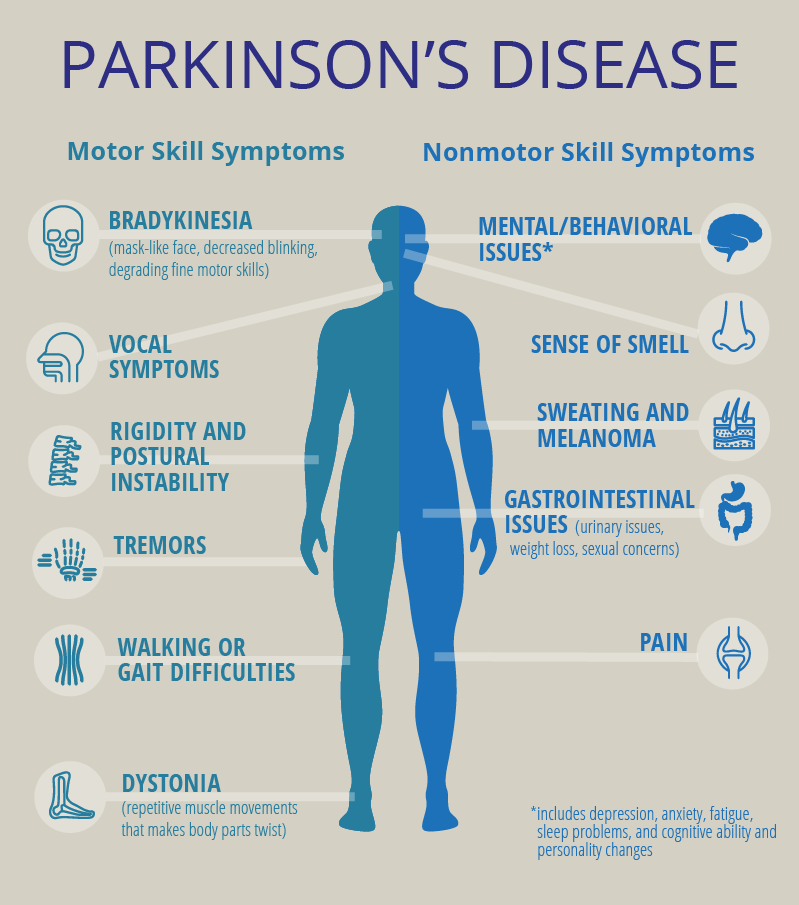


### Overview:
Parkinson's disease is a progressive nervous system disorder that affects movement. Symptoms start gradually, sometimes starting with a barely noticeable tremor in just one hand. Tremors are common, but the disorder also commonly causes stiffness or slowing of movement.

In the early stages of Parkinson's disease, your face may show little or no expression. Your arms may not swing when you walk. Your speech may become soft or slurred. Parkinson's disease symptoms worsen as your condition progresses over time.

Although Parkinson's disease can't be cured, medications might significantly improve your symptoms. Occasionally, your doctor may suggest surgery to regulate certain regions of your brain and improve your symptoms.


### Objective:
Using different machine learning models to predict the presence of parkinson's disease in an individual.

In [1]:
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

Let's now take a look in the Parkinson Dataset.

In [2]:
data=pd.read_csv("../input/parkinsons-data-set/parkinsons.data")
print(len(data))
data.head(15)

195


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


# Data Processing 
In this part we will prepare the data for training 


#### Steps
* Finding the labels and features to train the data.
* Scaling the features betweem -1 and 1 to normalize the data.
* Fitting the data and transforming it.
* Split the data into training and testing datasets.

In [3]:
labels=data.loc[:,'status'].to_numpy()
print(np.count_nonzero(labels==1))# number of positive labels
print(np.count_nonzero(labels==0))# number of negative labels

147
48


In [4]:
data2=data.drop(['status'],axis=1)# dropping the status column
data2.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.01351,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.01256,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.02444,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [5]:
features=data2[data2.columns[1:23]].to_numpy(dtype=object,na_value=0)
features

array([[119.992, 157.302, 74.997, ..., 0.266482, 2.3014419999999998,
        0.284654],
       [122.4, 148.65, 113.819, ..., 0.33559, 2.486855, 0.368674],
       [116.682, 131.111, 111.555, ..., 0.311173, 2.342259,
        0.33263400000000004],
       ...,
       [174.688, 240.005, 74.287, ..., 0.158453, 2.6797720000000003,
        0.13172799999999998],
       [198.764, 396.961, 74.904, ..., 0.207454, 2.138608, 0.123306],
       [214.289, 260.277, 77.973, ..., 0.190667, 2.555477, 0.148569]],
      dtype=object)

The MinMaxScaler transforms features by scaling them to a given range. The fit_transform() method fits to the data and then transforms it. We don’t need to scale the labels.

In [6]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

Spliting the data for training and testing

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(x, y, train_size=0.7, random_state=42)
print(X_train.shape)
print(Y_train.shape)

(136, 22)
(136,)


## Models
Different machine learning models are used to predict outcomes:
* Logistic Regression
* Decision Tree
* K nearest Neighbours
* Support Vector Machine
* Gaussian Naive Bayes
* Dense Neural Network
* XGBClassifier

## Logistic Regression Model

In [8]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression(solver = 'lbfgs', max_iter = 300)

# fit the data
model_1.fit(X_train, Y_train)

# Get predictions
Y_preds = model_1.predict(X_test)

# Get score
print(f1_score(Y_preds, Y_test)*100)

92.47311827956989


## Decision Tree Classifier Model

In [9]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()

# fit the data
model_2.fit(X_train, Y_train)

# Get predictions
Y_preds = model_2.predict(X_test)

# Get score
print(f1_score(Y_preds, Y_test)*100)

89.65517241379311


## K Nearest Neighbour Classifier Model

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

model_3 = BaggingClassifier(KNeighborsClassifier())

model_3.fit(X_train,Y_train)

Y_pred = model_3.predict(X_test)

print(f1_score(Y_test, Y_pred)*100)

95.55555555555557


## Support Vector Machine Model 

In [11]:
from sklearn import svm

model_4 = svm.SVC()

model_4.fit(X_train,Y_train)

Y_pred = model_4.predict(X_test)

print(f1_score(Y_test, Y_pred)*100)

92.63157894736842


## Gaussian Naive Bayes Classifier Model

In [12]:
from sklearn.naive_bayes import GaussianNB

model_5 = GaussianNB()

model_5.fit(X_train,Y_train)

Y_pred = model_5.predict(X_test)

print(f1_score(Y_test, Y_pred)*100)

82.5


## Dense Neural Network Model

In [13]:
import keras
from keras.layers import *

model_6=keras.models.Sequential([
    Dense(512,input_dim = 22,activation='relu'),
    BatchNormalization(),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64,activation='relu'),
    BatchNormalization(),
    Dense(1,activation='sigmoid')
])
model_6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               11776     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               5

In [14]:
opt = keras.optimizers.Adam(learning_rate=0.00001)

model_6.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model_6.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20
5/5 [==============================] - 0s 55ms/step - loss: 0.8249 - accuracy: 0.5000 - val_loss: 0.7057 - val_accuracy: 0.2881
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 0.8217 - accuracy: 0.5294 - val_loss: 0.6968 - val_accuracy: 0.4068
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 0.8138 - accuracy: 0.5441 - val_loss: 0.7042 - val_accuracy: 0.3559
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 0.8832 - accuracy: 0.4926 - val_loss: 0.7128 - val_accuracy: 0.3220
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 0.8642 - accuracy: 0.5588 - val_loss: 0.7198 - val_accuracy: 0.2881
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 0.8444 - accuracy: 0.4926 - val_loss: 0.7276 - val_accuracy: 0.2712
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.8270 - accuracy: 0.4853 - val_loss: 0.7338 - val_accuracy: 0.2542
Epoch 8/20
5/5 [=================

In [15]:
Y_preds = model_6.predict_classes(X_test)
print(f1_score(Y_test, Y_preds)*100)

4.444444444444445


## eXtreme Gradient Boosting Classifier Model

In [16]:
from xgboost import XGBClassifier

model_7=XGBClassifier()

model_7.fit(X_train,Y_train,verbose=True)

Y_pred=model_7.predict(X_test)

print(f1_score(Y_test, Y_pred)*100)

94.62365591397848


So among all the models F1 score of XGBClassifier is the highest.

## Scope of Improvements
* Better hyperparameter tuning
* Changing Learning Rate and Optimizers
